# TRACE Demo

The code below is intended to demonstrate the essential features of TRACE, compare it with its MATLAB predecessor TRACEv1, and establish guidelines for use and interpretation of its output. The code and output here are preliminary and subject to breaking changes.

## Overview

TRACE is organized as a Python application rather than a published package, and should be downloaded or cloned from its Github repository at [github.com/d-sandborn/pyTRACE](https://github.com/d-sandborn/pyTRACE) and installed locally as per the directions on that page. 

If you have questions, comments, or suggestion, please reach out to Daniel Sandborn at sandborn (at) uw.edu and Brendan Carter at brendan.carter (at) gmail.com. 

## Check Values

The first demonstration mirrors that on the TRACEv1 repo.

In [3]:
from pyTRACE import trace
import numpy as np
import pandas as pd
 
output = trace(output_coordinates=np.array([[0, 0, 0], [0, 0, 0]]),
               dates=np.array([2000, 2200]),
               predictor_measurements=np.array([[35, 20], [35, 20]]),
               predictor_types=np.array([1, 2]),
               atm_co2_trajectory=9,
               verbose_tf = False #to remove loading bars from the notebook
              )

output

<xarray.Dataset> Size: 320B
Dimensions:       (loc: 2)
Coordinates:
    year          (loc) float64 16B 2e+03 2.2e+03
    lon           (loc) int64 16B 0 0
    lat           (loc) int64 16B 0 0
    depth         (loc) int64 16B 0 0
Dimensions without coordinates: loc
Data variables: (12/16)
    canth         (loc) float64 16B 47.79 79.87
    mean_age      (loc) float64 16B 7.224 7.224
    mode_age      (loc) float64 16B 1.697 1.697
    dic           (loc) float64 16B 1.994e+03 2.026e+03
    dic_ref       (loc) float64 16B 1.946e+03 1.946e+03
    pco2          (loc) float64 16B 325.1 380.7
    ...            ...
    temperature   (loc) float64 16B 20.0 20.0
    salinity      (loc) float64 16B 35.0 35.0
    u_canth       (loc) float64 16B 8.645 12.92
    gamma         (loc) float64 16B 1.0 1.0
    delta         (loc) float64 16B 1.3 1.3
    scale_factor  (loc) float64 16B 0.05143 0.05143
Attributes:
    Conventions:        CF-1.12
    description:        Results of Tracer-based Rapid Anthropogenic Carbon Es...
    history:            2025-06-02 16:34:41.394958 3.12.8 | packaged by conda...
    references:         doi.org/10.5194/essd-2024-560
    co2sys_parameters:  {'pressure': 0, 'opt_pH_scale': 1, 'opt_k_carbonic': ...
    trace_parameters:   {'meas_uncerts': None, 'per_kg_sw_tf': True, 'canth_d...

## Speed Test

In [2]:
input_df = pd.DataFrame(
    {
        "lat": np.ones((10000)),
        "lon": np.linspace(-80, 80, 10000),
        "depth": np.random.normal(loc=1000, size=(10000)),
        "year": np.ones((10000)) * 2020,
        "sal": np.random.normal(loc=35, size=(10000)),
        "temp": np.random.normal(loc=15, size=(10000)),
    }
)

%timeit trace(output_coordinates=input_df[["lat", "lon", "depth"]].to_numpy(), dates=input_df.year.to_numpy(), predictor_measurements=input_df[["sal", "temp"]].to_numpy(),predictor_types=np.array([1, 2]),atm_co2_trajectory=5,verbose_tf = False)

/home/des/Insync/dsandborntahoe@gmail.com/Google Drive/Python_stuff/PyTRACE/pyTRACE/pyTRACE/neuralnets/__init__.py:447: RuntimeWarning: overflow encountered in exp
  return 2 / (1 + np.exp(-2 * n)) - 1
/home/des/Insync/dsandborntahoe@gmail.com/Google Drive/Python_stuff/PyTRACE/pyTRACE/pyTRACE/neuralnets/__init__.py:447: RuntimeWarning: overflow encountered in exp
  return 2 / (1 + np.exp(-2 * n)) - 1
/home/des/Insync/dsandborntahoe@gmail.com/Google Drive/Python_stuff/PyTRACE/pyTRACE/pyTRACE/neuralnets/__init__.py:447: RuntimeWarning: overflow encountered in exp
  return 2 / (1 + np.exp(-2 * n)) - 1
/home/des/Insync/dsandborntahoe@gmail.com/Google Drive/Python_stuff/PyTRACE/pyTRACE/pyTRACE/neuralnets/__init__.py:447: RuntimeWarning: overflow encountered in exp
  return 2 / (1 + np.exp(-2 * n)) - 1
/home/des/Insync/dsandborntahoe@gmail.com/Google Drive/Python_stuff/PyTRACE/pyTRACE/pyTRACE/neuralnets/__init__.py:447: RuntimeWarning: overflow encountered in exp
  return 2 / (1 + np.exp(-2 

33.8 s ± 865 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Regional Scale

In [48]:
import xarray as xr
ersst = xr.open_dataset("http://psl.noaa.gov/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc?lat[0:1:88],lon[0:1:179],time[0:1:2055],sst[0:1:2055][0:1:88][0:1:179]")
gridx, gridy = np.meshgrid(ersst.lon.data, ersst.lat.data)

input_df = pd.DataFrame(
    {
        "lon": gridx.ravel(),
        "lat": gridy.ravel(),
        "depth": np.ones(len(gridx.ravel()))*50,
        "year": np.ones(len(gridx.ravel())) * 2020,
        "sal": np.ones(len(gridx.ravel()))*35,
        "temp": ersst.sst[0,:,:].data.ravel()
    }
)

output = trace(output_coordinates=input_df[["lon", "lat", "depth"]].to_numpy(), 
               dates=input_df.year.to_numpy(), 
               predictor_measurements=input_df[["sal", "temp"]].to_numpy(),
               predictor_types=np.array([1, 2]),
               atm_co2_trajectory=5,
               verbose_tf = False)

output

/home/des/Insync/dsandborntahoe@gmail.com/Google Drive/Python_stuff/PyTRACE/pyTRACE/pyTRACE/neuralnets/__init__.py:353: RuntimeWarning: Mean of empty slice
  est_atl = np.nanmean(est_atl, axis=1)
/home/des/Insync/dsandborntahoe@gmail.com/Google Drive/Python_stuff/PyTRACE/pyTRACE/pyTRACE/neuralnets/__init__.py:354: RuntimeWarning: Mean of empty slice
  est_other = np.nanmean(est_other, axis=1)
/home/des/Insync/dsandborntahoe@gmail.com/Google Drive/Python_stuff/PyTRACE/pyTRACE/pyTRACE/neuralnets/__init__.py:447: RuntimeWarning: overflow encountered in exp
  return 2 / (1 + np.exp(-2 * n)) - 1


<xarray.Dataset> Size: 3MB
Dimensions:       (loc: 16020)
Coordinates:
    year          (loc) float64 128kB 2.02e+03 2.02e+03 ... 2.02e+03 2.02e+03
    lon           (loc) float64 128kB 0.0 2.0 4.0 6.0 ... 354.0 356.0 358.0
    lat           (loc) float64 128kB 88.0 88.0 88.0 88.0 ... -88.0 -88.0 -88.0
    depth         (loc) float64 128kB 50.0 50.0 50.0 50.0 ... 50.0 50.0 50.0
Dimensions without coordinates: loc
Data variables: (12/16)
    canth         (loc) float64 128kB 43.86 44.13 44.4 44.65 ... nan nan nan nan
    mean_age      (loc) float64 128kB 11.38 10.94 10.53 10.13 ... nan nan nan
    mode_age      (loc) float64 128kB 2.674 2.571 2.473 2.38 ... nan nan nan nan
    dic           (loc) float64 128kB 2.185e+03 2.185e+03 2.185e+03 ... nan nan
    dic_ref       (loc) float64 128kB 2.141e+03 2.141e+03 2.141e+03 ... nan nan
    pco2          (loc) float64 128kB 369.3 370.0 370.7 371.4 ... nan nan nan
    ...            ...
    temperature   (loc) float64 128kB -1.8 -1.8 -1.8 -1.8 ... nan nan nan nan
    salinity      (loc) float64 128kB 35.0 35.0 35.0 35.0 ... 35.0 35.0 35.0
    u_canth       (loc) float64 128kB 8.163 8.196 8.228 8.259 ... nan nan nan
    gamma         (loc) float64 128kB 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    delta         (loc) float64 128kB 1.3 1.3 1.3 1.3 1.3 ... 1.3 1.3 1.3 1.3
    scale_factor  (loc) float64 128kB 0.08103 0.0779 0.07494 ... nan nan nan
Attributes:
    Conventions:        CF-1.12
    description:        Results of Tracer-based Rapid Anthropogenic Carbon Es...
    history:            2025-06-02 17:17:59.943200 3.12.8 | packaged by conda...
    references:         doi.org/10.5194/essd-2024-560
    co2sys_parameters:  {'pressure': 0, 'opt_pH_scale': 1, 'opt_k_carbonic': ...
    trace_parameters:   {'meas_uncerts': None, 'per_kg_sw_tf': True, 'canth_d...

Text(0.5, 1.0, 'Canth at 50m depth assuming SST from ERSSTv5')

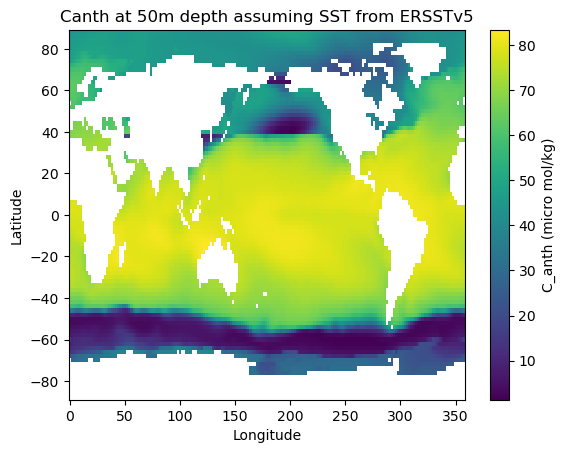

In [50]:
fig, ax = plt.subplots()
p = ax.pcolormesh(gridx, gridy, np.reshape(output.canth.data, gridx.shape))
fig.colorbar(p, label= 'C_anth (micro mol/kg)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Canth at 50m depth assuming SST from ERSSTv5')